In [18]:
#ВОЗЬМЕМ ДЛЯ КАЖДОЙ ГИПЕРМЫШИ КЛОНОТИПЫ И ИХ ДОЛИ



In [25]:
def read_clon_file(path):
    
    with open(path) as f:
        lis = [line.split('\t') for line in f] 
        lenlis=len(lis)
        clones=[x[3] for x in lis]
        dole=[x[1] for x in lis]
        
        #ff=int(lenlis/1.0001)
        #clones=clones[0:ff]
        #dole=dole[0:ff]
        
    return clones,dole

In [26]:
pathCl01Agr="./PoolSamples/PoolSamples05092019alpha.pool.aa.table.txt"
pathCl02Agr="./PoolSamples/PoolSamples18112019alpha.pool.aa.table.txt" 
pathCl03Agr="./PoolSamples/PoolSamples16012020alpha.pool.aa.table.txt"
pathCl04Agr="./PoolSamples/PoolSamples27112019_1-5_alpha.pool.aa.table.txt"
pathCl05Agr="./PoolSamples/PoolSamples27112019_6-10_alpha.pool.aa.table.txt"

gr1A=read_clon_file(pathCl01Agr)
#print('gr_1 ',gr1A[0])
gr2A=read_clon_file(pathCl02Agr)
#print('gr_2 ',gr2A[0])
gr3A=read_clon_file(pathCl03Agr)
#print('gr_3 ',gr3A[0])
gr4A=read_clon_file(pathCl04Agr)
#print('gr_4 ',gr4A[0])
gr5A=read_clon_file(pathCl05Agr)
#print('gr_5 ',gr5A[0])
print('done')

done


In [27]:
import pandas as pd 
datagr1A = {'clones':gr1A[0][1:],'dole1':gr1A[1][1:]}
datagr2A = {'clones':gr2A[0][1:],'dole2':gr2A[1][1:]}
datagr3A = {'clones':gr3A[0][1:],'dole1':gr3A[1][1:]}
datagr4A = {'clones':gr4A[0][1:],'dole2':gr4A[1][1:]}
datagr5A = {'clones':gr5A[0][1:],'dole3':gr5A[1][1:]}

In [46]:
import pandas as pd
#df = pd.DataFrame(data)
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

#CUSTOM
#1a+2a
table1pd=pd.DataFrame(data=datagr3A)
table2pd=pd.DataFrame(data=datagr4A)
result12 = table1pd.append(table2pd, sort=False)

#for third
table3pd=pd.DataFrame(data=datagr5A)
result12 = result12.append(table3pd, sort=False)

In [47]:
import math

clones12=list(result12.clones)

dole1=list(result12.dole1)
for i in range (0,len(dole1)):
    dole1[i]=float(dole1[i])
    if math.isnan(float(dole1[i])): dole1[i]=0

dole2=list(result12.dole2)
for i in range (0,len(dole2)):
    dole2[i]=float(dole2[i])
    #print(i)
    if math.isnan(float(dole2[i])): dole2[i]=0
  
#for third
dole3=list(result12.dole3)
for i in range (0,len(dole3)):
    dole3[i]=float(dole3[i])
    #print(i)
    if math.isnan(float(dole3[i])): dole3[i]=0

In [48]:
#http://www.tiem.utk.edu/~gross/bioed/bealsmodules/shannonDI.html
#Shannon diversity index H
import math

def shannonH(valuelist):
    shannonHres=0
    l=0
    for n in valuelist:
        l+=1
        if n!=0: shannonHres+=n*math.log(n)
    return shannonHres*(-1)

In [49]:
#Shannon diversity index (H)
print(shannonH(dole1))
print(shannonH(dole2))
#for third
print(shannonH(dole3))

10.78381244330731
10.030872943403885
10.421109620795884


In [50]:
#Shannon's equitability (EH)
print(shannonH(dole1)/math.log(len(dole1)))
print(shannonH(dole2)/math.log(len(dole2)))
#for third
print(shannonH(dole3)/math.log(len(dole3)))

0.811632520348184
0.7549633055237378
0.784334066529558


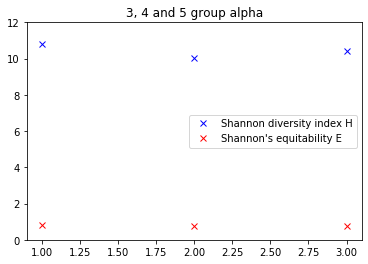

In [51]:
import matplotlib.pyplot as plt
gr=[1,2,3]
sh=[10.78,10.03,10.42]
esh=[0.81,0.75,0.78]
plt.title('3, 4 and 5 group alpha')
plt.plot(gr,sh,'bx', label='Shannon diversity index H')
plt.plot(gr,esh,'rx', label='Shannon\'s equitability E')
plt.ylim(bottom=0,ymax=12)

#plt.xlim(xmin=0.5,xmax=2.5)
plt.legend() 
plt.show()

In [52]:
len(clones12)

589229

In [53]:
len(gr1A[0])+len(gr2A[0])+len(gr3A[0])

697954

In [54]:
len(gr2A[0])

199257

In [55]:
199257+171347

370604

In [56]:
result12

,clones,dole1,dole2,dole3
0,CVVGDRGSALGRLHF,0.025162792020245926,NaN,NaN
1,CALCW,0.002367440783514033,NaN,NaN
2,CAASASSGSWQLIF,0.0014221705873511718,NaN,NaN
3,CAAASSGSWQLIF,0.0011061326790509113,NaN,NaN
4,CVVADRGSALGRLHF,9.704557364130104E-4,NaN,NaN
...,...,...,...,...
149032,CALISTSSGQKLVF,NaN,NaN,1.2092263974122555E-6
149033,CALVTANSGTYQRF,NaN,NaN,1.2092263974122555E-6
149034,CALSDTYNNNAPRF,NaN,NaN,1.2092263974122555E-6
149035,CALSDLSSGQKLVF,NaN,NaN,1.2092263974122555E-6


In [119]:
###Mann Whitney U-test
###https://pythonhealthcare.org/2018/04/13/53-statistics-mann-whitney-u-test/

import numpy as np
import scipy.stats as stats

# Create two groups of data

#group1 = [1, 5 ,7 ,3 ,5 ,8 ,34 ,1 ,3 ,5 ,200, 3]
#group2 = [10, 18, 11, 12, 15, 19, 9, 17, 1, 22, 9, 8]

# Calculate u and probability of a difference


grI = [x for x in gr4A[1][1:20000]]
grII = [x for x in gr5A[1][1:20000]]

print(len(gr1A[1][1:]),len(gr2A[1][1:]),"\n")

u_statistic, pVal = stats.mannwhitneyu(grI,grII)#,decimals=12)

#print(np.round(stats.mannwhitneyu(gr1A[1][1:],gr2A[1][1:]).pvalue, decimals=40))
# Print results

print ('P value:')
print ( pVal)
#print ("%.100f" % pVal)
print("\nu_statistic\n",u_statistic)

171346 199256 

P value:
2.8520770439120307e-17

u_statistic
 190319792.0


In [59]:
dole1

[0.025162792020245926,
 0.002367440783514033,
 0.0014221705873511718,
 0.0011061326790509113,
 0.0009704557364130104,
 0.0009261779317796834,
 0.0008697135754124132,
 0.0008238108972145605,
 0.0008083745983515657,
 0.0007994377937466741,
 0.0007710025063674732,
 0.0007490667132463755,
 0.0007429734373794039,
 0.0007340366327745122,
 0.000725506046560752,
 0.0006791971499717678,
 0.0006755411844515849,
 0.0006751349660604534,
 0.0006560427016772758,
 0.0006377628740763609,
 0.0006137959889996059,
 0.0006068902763503715,
 0.0005934850694430339,
 0.0005934850694430339,
 0.0005861731384026681,
 0.0005841420464470108,
 0.0005825171728824851,
 0.0005496134832008384,
 0.0005288963452531349,
 0.0005260528165152149,
 0.0005146787015635346,
 0.0005069605521320372,
 0.0005061481153497743,
 0.0005053356785675115,
 0.0004976175291360141,
 0.000488274506139991,
 0.00048015013831736216,
 0.0004785252647528364,
 0.0004773066095794421,
 0.000474463080841522,
 0.0004708071153213391,
 0.00047040089693020

In [19]:
#not work
#import sys
#!{sys.executable} -m pip install lightfm --upgrade --ignore-installed scipy

In [128]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

def visualtopclon(tableclon,nametitle,mice_names,clon_names,wi,hi):
    
    # visualmismatch as script


    vertical = clon_names
    horizontal = mice_names

    harvest = np.array(tableclon)
    #print(harvest)

    width_in_inches = wi
    height_in_inches = hi
    
    fig, ax = plt.subplots(figsize=(width_in_inches, height_in_inches))
    im = ax.imshow(harvest)

# We want to show all ticks...
    ax.set_xticks(np.arange(len(horizontal)))
    ax.set_yticks(np.arange(len(vertical)))
# ... and label them with the respective list entries
    ax.set_xticklabels(horizontal)
    ax.set_yticklabels(vertical)

# Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=90, ha="right",
             rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
#    for i in range(len(vertical)):
#        for j in range(len(horizontal)):
#            text = ax.text(j, i, "%.2f" %(harvest[i, j]),
#                           ha="center", va="center", color="w")
    
# Create colorbar
    cbarlabel=""
    cbar = ax.figure.colorbar(im, ax=ax)#, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    #from matplotlib.pyplot import figure
    #figure(num=None, figsize=(80, 6), dpi=80, facecolor='w', edgecolor='k')

    ax.set_title(nametitle)
    fig.tight_layout()
    plt.show()

TypeError: Image data of dtype object cannot be converted to float

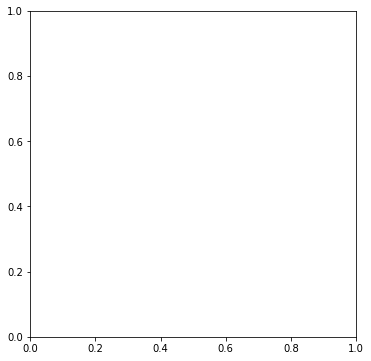

In [132]:
visualtopclon(result12,'dd',result12.clones,[dole1,dole2],18,6)